# Artificial Neural Network

An Artificial Neural Network (ANN) is a machine learning model inspired by the human brain's neural structure. It consists of interconnected nodes, or neurons, organized into layers: an input layer, hidden layers, and an output layer. Each connection between nodes has a weight, and nodes apply an activation function to their weighted inputs. During training, the network adjusts weights to minimize the difference between predicted and actual outputs. ANNs excel in complex tasks, learning patterns, and making predictions.



Used ANN for classification as well as regression task 

In [72]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import talib as ta

In [32]:
# download historical prices
df = yf.download('EURUSD=X',start='2009-12-31',end='2018-12-28')

[*********************100%***********************]  1 of 1 completed


In [33]:
# Copying the original dataframe. Will work on the new dataframe.
data = df.copy()


In [34]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,1.434206,1.443897,1.431045,1.432706,1.432706,0
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0


### Feature Engineering

In [35]:
# Creating features
features_list = []

# SD based features
for i in range(5, 20, 5):
    col_name = 'std_' + str(i)
    data[col_name] = data['Close'].rolling(window=i).std()
    features_list.append(col_name)
    
# MA based features
for i in range(10, 30, 5):
    col_name = 'ma_' + str(i)
    data[col_name] = data['Close'].rolling(window=i).mean()
    features_list.append(col_name)
    
# Daily pct change based features
for i in range(3, 12, 3):
    col_name = 'pct_' + str(i)
    data[col_name] = data['Close'].pct_change().rolling(i).sum()
    features_list.append(col_name)
    
# Intraday movement
col_name = 'co'
data[col_name] = data['Close'] - data['Open']
features_list.append(col_name)

In [36]:
features_list

['std_5',
 'std_10',
 'std_15',
 'ma_10',
 'ma_15',
 'ma_20',
 'ma_25',
 'pct_3',
 'pct_6',
 'pct_9',
 'co']

In [37]:
# bollinger band
data['upper_band'], data['middle_band'], data['lower_band'] = ta.BBANDS(data['Close'].values)

#MACD
data['macd'], data['macdsignal'], data['macdhist'] = ta.MACD(data['Close'].values)

#SAR
data['sar'] = ta.SAR(data['High'].values, data['Low'].values)


features_list +=['upper_band','middle_band','lower_band','macd','sar']

In [38]:
features_list

['std_5',
 'std_10',
 'std_15',
 'ma_10',
 'ma_15',
 'ma_20',
 'ma_25',
 'pct_3',
 'pct_6',
 'pct_9',
 'co',
 'upper_band',
 'middle_band',
 'lower_band',
 'macd',
 'sar']

In [39]:
data.dropna(inplace=True)

In [40]:
data[features_list].head()

,std_5,std_10,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,co,upper_band,middle_band,lower_band,macd,sar
Date,,,,,,,,,,,,,,,,
2010-02-16,0.007174,0.008744,0.013772,1.372029,1.379814,1.387765,1.398622,0.006298,0.008339,-0.009467,0.016979,1.381636,1.368802,1.355968,-0.020450,1.353308
2010-02-17,0.006823,0.006695,0.012981,1.369088,1.376987,1.385247,1.394954,-0.001914,-0.012626,-0.009872,-0.015846,1.378081,1.365875,1.353669,-0.020266,1.353797
2010-02-18,0.010875,0.009546,0.014006,1.366253,1.373610,1.382070,1.390800,-0.010262,-0.021224,-0.015841,-0.014914,1.380923,1.361469,1.342016,-0.021051,1.378873
2010-02-19,0.010818,0.009634,0.013834,1.365603,1.371931,1.379440,1.387697,-0.010913,-0.004615,-0.002574,0.014452,1.380425,1.361072,1.341720,-0.020201,1.378873
2010-02-22,0.010814,0.009766,0.012841,1.365113,1.369788,1.376718,1.384492,0.000027,-0.001887,-0.012599,-0.002337,1.380469,1.361124,1.341779,-0.019380,1.378196


In [41]:
#generate target variable
X = data[features_list]
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)
y = data['target']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1847, 16), (462, 16), (1847,), (462,))

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
X_train.columns

Index(['std_5', 'std_10', 'std_15', 'ma_10', 'ma_15', 'ma_20', 'ma_25',
       'pct_3', 'pct_6', 'pct_9', 'co', 'upper_band', 'middle_band',
       'lower_band', 'macd', 'sar'],
      dtype='object')

In [47]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# and as x_test is testing data we will keep it hidden and not calculate zscore

In [48]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#The scaled training data is converted to a DataFrame (X_train_scaled_df) to facilitate visualization and analysis. 



In [49]:
X_train_scaled_df.describe().round(2)

,std_5,std_10,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,co,upper_band,middle_band,lower_band,macd,sar
count,1847.00,1847.00,1847.00,1847.00,1847.00,1847.00,1847.00,1847.00,1847.00,1847.00,1847.00,1847.00,1847.00,1847.00,1847.00,1847.00
mean,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.55,-1.68,-1.62,-1.89,-1.88,-1.87,-1.85,-4.14,-3.95,-3.63,-9.33,-1.94,-1.89,-1.88,-3.28,-4.14
25%,-0.75,-0.73,-0.73,-1.15,-1.18,-1.19,-1.20,-0.60,-0.60,-0.65,-0.03,-1.14,-1.14,-1.13,-0.57,-1.03
50%,-0.21,-0.20,-0.20,0.33,0.33,0.32,0.32,0.01,-0.01,0.01,0.01,0.32,0.32,0.33,0.07,0.32
75%,0.51,0.54,0.54,0.81,0.81,0.82,0.83,0.62,0.62,0.63,0.06,0.78,0.81,0.82,0.65,0.78
max,5.35,4.03,4.46,1.84,1.76,1.72,1.68,3.98,3.14,3.10,10.92,2.02,1.93,2.01,3.37,1.97


In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
MLPClassifier?

In [52]:
# Define model

model = MLPClassifier(hidden_layer_sizes=(5), max_iter=300, activation = 'tanh', solver='adam', random_state=1, shuffle=False)

# Train model
model.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=5, max_iter=300,
              random_state=1, shuffle=False)

In [53]:
# Check number of layers in the model
model.n_layers_

3

In [54]:
# Check weights
print('Weights between input layer and the hidden layer:')
print(model.coefs_[0])
print('Biases between input layer and the hidden layer:')
print(model.intercepts_[0])

Weights between input layer and the hidden layer:
[[ 0.1906901   0.0579818  -0.19468221 -0.02306695 -0.19404353]
 [-0.19192638 -0.53147275  0.06213065  0.00828938  0.20600657]
 [ 0.11918324  0.00131944 -0.17041228  0.54841862 -0.49120075]
 [ 0.26492481 -0.1018542   0.13483914 -0.43780642 -0.27469322]
 [ 0.39489489  0.49801471 -0.13353068  0.14910007  0.44486949]
 [ 0.49952566 -0.44279923 -0.42765749 -0.40177063  0.44756863]
 [-0.34984849 -0.0808474   0.55099759 -0.01149621  0.24853633]
 [-0.34274318  0.15168506  0.30780765 -0.45729824  0.3406113 ]
 [ 0.46317592  0.14395837 -0.36172514  0.30396917 -0.48403983]
 [ 0.19229994  0.10778842 -0.29001463 -0.01359776 -0.26714594]
 [-0.17362383 -0.12930097 -0.07140831  0.07144226  0.23888272]
 [-0.37710127  0.05214864 -0.29028884  0.0554003   0.26866131]
 [-0.33679454 -0.11132456  0.27595263 -0.14259064 -0.43496643]
 [ 0.11376412  0.16376341  0.06354817  0.41323017  0.12870295]
 [ 0.39067817 -0.43943841 -0.39709343  0.1415785  -0.17026514]
 [-0.

In [55]:
print('Weights between hidden layer and the output layer:')
print(model.coefs_[1])
print('Biases between hidden layer and the output layer:')
print(model.intercepts_[1])

Weights between hidden layer and the output layer:
[[ 0.63055751]
 [-0.16053368]
 [ 0.71555463]
 [ 0.3826028 ]
 [ 0.2055382 ]]
Biases between hidden layer and the output layer:
[-0.5331001]


In [56]:
# Check model accuracy on training data
print('Model accuracy on training data:', model.score(X_train_scaled, y_train))

Model accuracy on training data: 0.5240931239848403


In [57]:
# Check model accuracy on testing data
print('Model accuracy on testing data:', model.score(X_test_scaled, y_test))

Model accuracy on testing data: 0.5021645021645021


In [58]:
# Predict data
y_pred = model.predict(X_test_scaled)

In [59]:
# Calculate Precision and Recall
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.5095786126011975
Recall: 0.5021645021645021


# MLP Regressor

In [60]:
#import necessary libraires
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error


In [61]:

# Download data
stock_symbol = "TCS"
start_date = "2013-12-31"
end_date = "2023-12-30"
data = yf.download(stock_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [62]:
#generate target values
data['cc_returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

In [63]:

# Generate features
features_list = []

#Moving Average
for i in [10,15,25,35]:
    col_name = 'SMA_' + str(i)
    data[col_name] = data['Close'].rolling(window=i).mean()
    features_list.append(col_name)

# RSI
window_length = 14
diff = data['Close'].diff(1)
gain = diff.where(diff > 0, 0)
loss = -diff.where(diff < 0, 0)
avg_gain = gain.rolling(window=window_length).mean()
avg_loss = loss.rolling(window=window_length).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
features_list.append('RSI')

# Bollinger band
window_length = 20
data['MA'] = data['Close'].rolling(window=window_length).mean()
data['std_dev'] = data['Close'].rolling(window=window_length).std()
data['UpperBand'] = data['MA'] + 2 * data['std_dev']
data['LowerBand'] = data['MA'] - 2 * data['std_dev']
features_list.extend(['UpperBand', 'LowerBand'])
data.dropna(inplace=True)
    

In [64]:

print(data.head())


                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2014-02-21  35.509998  35.959999  35.040001  35.169998  32.876305   240900   
2014-02-24  34.000000  34.480000  33.040001  34.110001  31.885435  1427100   
2014-02-25  33.650002  33.980000  32.799999  33.310001  31.137611   544400   
2014-02-26  33.689999  35.250000  33.320000  34.930000  32.651958   633500   
2014-02-27  34.900002  36.099998  34.500000  35.970001  33.624130   315300   

            cc_returns     target  SMA_10     SMA_15   SMA_25     SMA_35  \
Date                                                                       
2014-02-21   -0.013556  34.110001  37.012  36.836666  37.1660  38.216857   
2014-02-24   -0.030603  33.310001  36.581  36.660666  36.9740  37.940571   
2014-02-25   -0.023733  34.930000  36.094  36.472000  36.7712  37.673429   
2014-02-26    0.047488  35.970001  35.672  36.350667  36.6312  37.443429 

In [65]:

# Generate train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data[features_list].iloc[:-1],
    data.iloc[:-1]['target'],
    test_size=0.25,
    shuffle=False
)


In [66]:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [67]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe().round(2)



,SMA_10,SMA_15,SMA_25,SMA_35,RSI,UpperBand,LowerBand
count,1860.00,1860.00,1860.00,1860.00,1860.00,1860.00,1860.00
mean,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.08,-1.07,-1.06,-1.05,-2.66,-1.10,-1.07
25%,-0.71,-0.70,-0.70,-0.68,-0.67,-0.72,-0.70
50%,-0.47,-0.47,-0.48,-0.49,0.01,-0.44,-0.50
75%,0.64,0.62,0.62,0.61,0.71,0.68,0.54
max,3.62,3.57,3.55,3.63,2.76,3.36,3.73


In [68]:

# Build model
model = MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=800, activation='relu', solver='adam', random_state=1, shuffle=False)

model.fit(X_train_scaled, y_train)


MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=800, random_state=1,
             shuffle=False)

In [69]:

# Evaluate model
y_pred_train = model.predict(X_train_scaled)
print('Model accuracy on training data:', model.score(X_train_scaled, y_train))

y_pred = model.predict(X_test_scaled)
print('Model accuracy on testing data:', model.score(X_test_scaled, y_test))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)



Model accuracy on training data: 0.9914580407529877
Model accuracy on testing data: 0.9756699057830946
Mean Squared Error: 0.2675279828550034
Mean Absolute Error: 0.4050753771866306


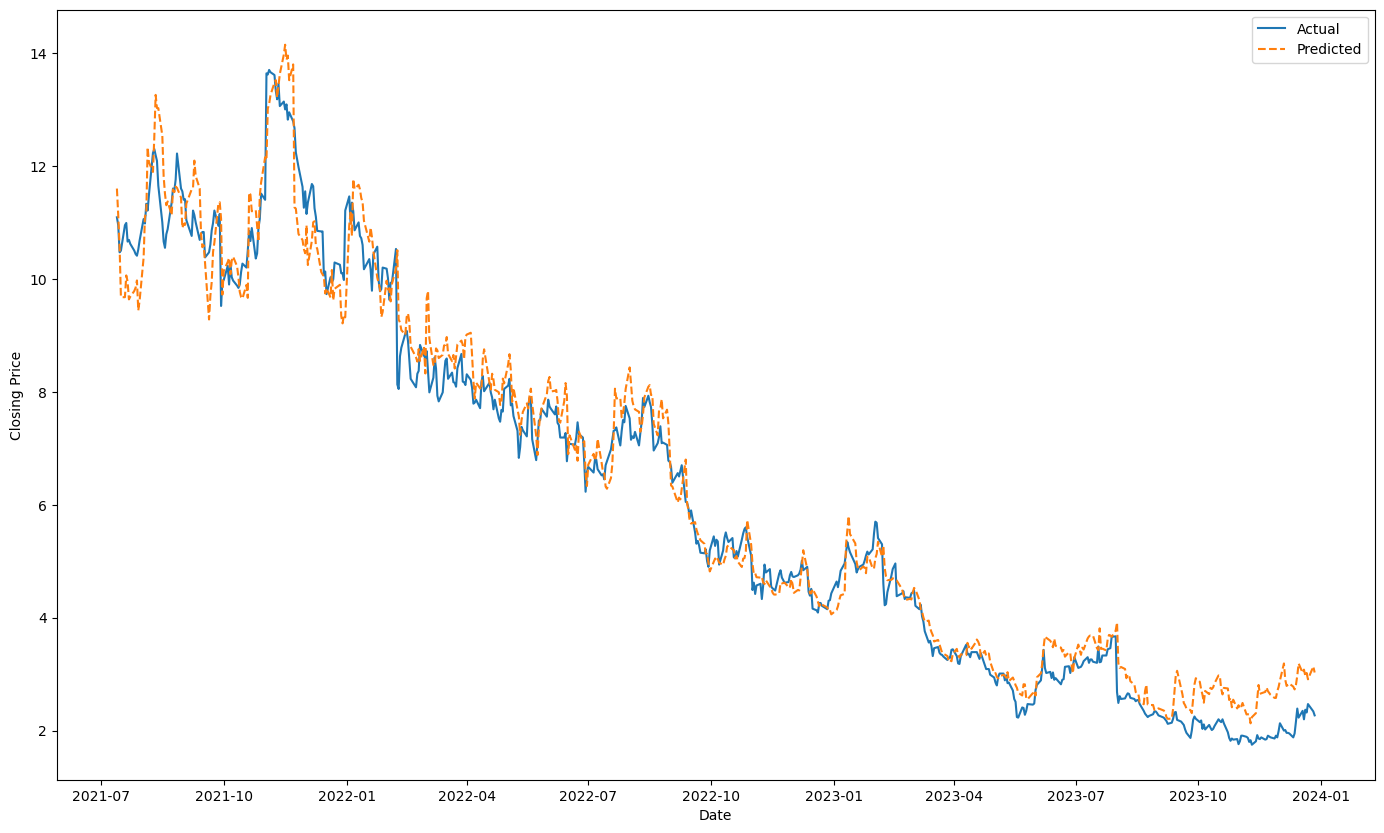

In [70]:
# Plot results
plt.figure(figsize=(17, 10))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, model.predict(X_test_scaled), label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [71]:

print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))

            Actual  Predicted
Date                         
2021-07-13   11.09  11.598879
2021-07-14   10.95  11.121639
2021-07-15   10.47  10.575817
2021-07-16   10.50   9.675989
2021-07-19   10.95   9.675299
...            ...        ...
2023-12-20    2.37   2.971376
2023-12-21    2.32   3.020812
2023-12-22    2.47   2.908223
2023-12-26    2.34   3.135717
2023-12-27    2.27   3.028868

[620 rows x 2 columns]
